In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train (1).csv')

In [ ]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
train_label = pd.read_csv('/content/drive/MyDrive/pumptrain labels.csv')

In [ ]:
train_label.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


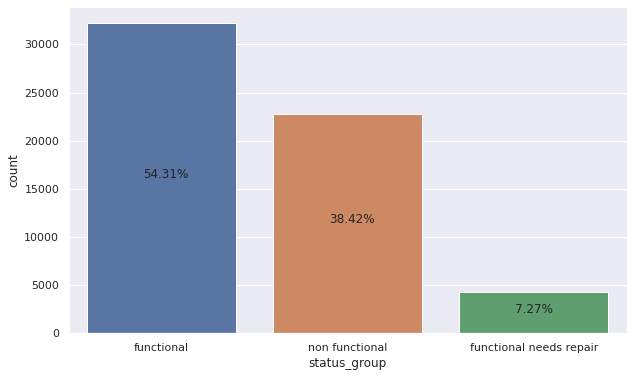

In [ ]:
#plot the target variable to view
plt.subplots(figsize=(10,6))
ax = sns.countplot(x=train_label['status_group'])
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()*100/len(train_label)), (p.get_x()+0.3, p.get_height()*0.5))

There are 3 types of statuses with different percentages. Functional needs repair is lowest. The visualization indicates that classess are imbalanced

In [ ]:
# Merge labels with main data for ease in subsequent data clearning & transformation processes
train = train.merge(train_label, how='inner', on='id')

In [ ]:
#Get info on columns, and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
# Check unique count of respective columns. 
# This will help in identifying categorical & non-categorical data
train.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [ ]:
train.isnull().sum()/len(train)*100

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

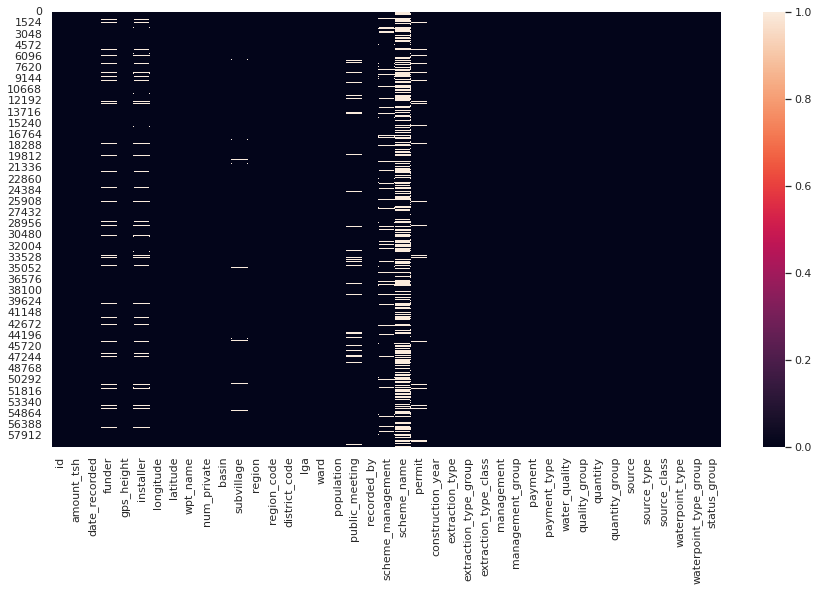

In [ ]:
# Get visual sense of null data
plt.subplots(figsize=(15,8))
sns.heatmap(train.isnull())

**Cleaning & Transforming Data**


In [ ]:
# Describe all columns to get top frequencies, min/max, means, deviations
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,59400.0,NaN,NaN,NaN,37115.131768,21453.128371,0.0,18519.75,37061.5,55656.5,74247.0
amount_tsh,59400.0,NaN,NaN,NaN,317.650385,2997.574558,0.0,0.0,0.0,20.0,350000.0
date_recorded,59400,356,2011-03-15,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,55765,1897,Government Of Tanzania,9084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_height,59400.0,NaN,NaN,NaN,668.297239,693.11635,-90.0,0.0,369.0,1319.25,2770.0
installer,55745,2145,DWE,17402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59400.0,NaN,NaN,NaN,34.077427,6.567432,0.0,33.090347,34.908743,37.178387,40.345193
latitude,59400.0,NaN,NaN,NaN,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-0.0
wpt_name,59400,37400,none,3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_private,59400.0,NaN,NaN,NaN,0.474141,12.23623,0.0,0.0,0.0,0.0,1776.0


**Observations:**

; Certain columns are either grouped or encoded values of another column e.g: 
quantity vs quantity_group, region vs region_code

; Some look like free texts or too many nulls, or just having zeros. e.g: wpt_name, scheme_name, amount_tsh, num_private

; Some categorical variables have too many unique values

**Strategy:**

; Keep one of the columns which are either grouped or encoded

; Drop columns with mostly nulls or zeros

; Keep top 10-15 of the non-categorical data like funder, installer etc.

In [ ]:
#df_pump[df_pump.amount_tsh==0]['amount_tsh'].count()
#len(df_pump[df_pump.public_meeting.isnull()==True]) -> 3334
#df_pump.recorded_by.nunique()

#df_pump.scheme_name
#df_pump.scheme_name.nunique()
#len(df_pump[df_pump.scheme_name.isnull()==True]) -> 28166

#df_pump.permit -> True/False
#len(df_pump[df_pump.permit.isnull()==True]) -> 3056

#df_pump.construction_year.nunique() -> 55 years
#max(df_pump.construction_year) -> 2013
#len(df_pump[df_pump.construction_year==0]) -> 20709

#df_pump.construction_year.nunique() -> 55 years
#max(df_pump.construction_year) -> 2013
#len(df_pump[df_pump.construction_year==0]) -> 20709

In [ ]:
# Removing columns as:
    # amount_tsh -> 75% are zeros and has outliers
    # wpt_name -> free text, mostly nuls
    # latitude, longitude -> as other geographic locations available
    # num_private -> no clue, almost no data
    # subvillage -> will use district code
    # region -> will use region code
    # lga, ward -> yet another geographic locations
    # recorded_by -> just one value
    # scheme_name -> more than 50% null, free text, will use scheme management
    # extraction_type & extraction_type_class -> will use extraction_type_group
    # management_group -> will use management
    # payment -> will use payment_type
    # water_quality -> will use quality_group
    # quantity -> will use quantity_group
    # source_type, source_class -> will use source
    # waterpoint_type -> will use waterpoint_type_group
    
train = train.drop(['amount_tsh','wpt_name','latitude','longitude','num_private','subvillage',
                        'region','lga','ward','recorded_by','scheme_name','extraction_type',
                        'extraction_type_class','management_group','payment','water_quality',
                        'quantity','source_type','source_class','waterpoint_type'], axis=1)    

In [ ]:
#Drop NaN values

train = train.dropna()
train

,id,date_recorded,funder,gps_height,installer,basin,region_code,district_code,population,public_meeting,...,permit,construction_year,extraction_type_group,management,payment_type,quality_group,quantity_group,source,waterpoint_type_group,status_group
0,69572,2011-03-14,Roman,1390,Roman,Lake Nyasa,11,5,109,True,...,False,1999,gravity,vwc,annually,good,enough,spring,communal standpipe,functional
2,34310,2013-02-25,Lottery Club,686,World vision,Pangani,21,4,250,True,...,True,2009,gravity,vwc,per bucket,good,enough,dam,communal standpipe,functional
3,67743,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,90,63,58,True,...,True,1986,submersible,vwc,never pay,good,dry,machine dbh,communal standpipe,non functional
5,9944,2011-03-13,Mkinga Distric Coun,0,DWE,Pangani,4,8,1,True,...,True,2009,submersible,vwc,per bucket,salty,enough,other,communal standpipe,functional
6,19816,2012-10-01,Dwsp,0,DWSP,Internal,17,3,0,True,...,True,0,swn 80,vwc,never pay,good,enough,machine dbh,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,11164,2011-03-09,World Bank,351,ML appro,Wami / Ruvu,5,6,89,True,...,True,2007,submersible,vwc,monthly,good,enough,machine dbh,communal standpipe,non functional
59395,60739,2013-05-03,Germany Republi,1210,CES,Pangani,3,5,125,True,...,True,1999,gravity,water board,per bucket,good,enough,spring,communal standpipe,functional
59396,27263,2011-05-07,Cefa-njombe,1212,Cefa,Rufiji,11,4,56,True,...,True,1996,gravity,vwc,annually,good,enough,river,communal standpipe,functional
59398,31282,2011-03-08,Malec,0,Musa,Rufiji,1,4,0,True,...,True,0,nira/tanira,vwc,never pay,good,insufficient,shallow well,hand pump,functional


In [ ]:
#Limiting funder & installer categorical values

# Current counts of funder & installer
[train['funder'].nunique(), train['installer'].nunique()]

[1588, 1799]

In [ ]:
df_fgb = train.groupby(['funder'], as_index=False).count()[['funder', 'id']]
df_fgb

,funder,id
0,0,344
1,A/co Germany,15
2,Aar,32
3,Abas Ka,1
4,Abasia,43
...,...,...
1583,Yasini Selemani,1
1584,Zaben,2
1585,Zaburi And Neig,1
1586,Zinduka,1


In [ ]:
# Funders with less than 5 pumps, will be renamed to Other
other_funders = df_fgb[df_fgb.id<5].funder.unique()
train['funder'] = train['funder'].apply(lambda x : x if (x not in other_funders)  else 'Other')

In [ ]:
# Installers with less than 5 pumps, will be renamed to Other
df_igb = train.groupby(['installer'], as_index=False).count()[['installer', 'id']]
other_installers = df_igb[df_igb.id<5].installer.unique()
train['installer'] = train['installer'].apply(lambda x : x if (x not in other_installers)  else 'Other')

In [ ]:
# Cleanup
del df_fgb
del df_igb

# View reduced counts
[train['funder'].nunique(), train['installer'].nunique()]

[520, 566]

**Analyze Relations & Create New Features**

; Making some assumptions about the features that could play key role:

; Age of the waterpoint -> older ones might need more repairs

; Population around pump -> probably dense population around waterpoint will cause heavy usage and require more maintenance

; How the waterpoint is managed

; The source of the water

; Payment type -> what or how the water costs are paid

; Type of Waterpoint -> Probably certain types need more maintenance

In [ ]:
#Analyzing Relation with Age of the Waterpoint
train['date_recorded'].max()

'2013-12-03'

In [ ]:
train['construction_year'].max()

2013

In [ ]:
# We have date fields as date_recorded and construction_year, will consider the later one
train['construction_year'].unique()

array([1999, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008, 1974,
       2000, 2002, 2004, 1972, 2003, 2007, 1973, 1985, 2010, 2006, 1962,
       2005, 1997, 1970, 1996, 1977, 1983, 2012, 1984, 1982, 1976, 1988,
       1989, 1975, 1960, 1995, 1961, 1998, 1963, 1990, 1994, 1968, 1980,
       1993, 2001, 1979, 1967, 1971, 1969, 1981, 2013, 1964, 1966, 1965])

In [ ]:
# create a new feature 'age' relative to the max construction year
train['age'] = train['construction_year'].apply(lambda x: (2013 - x) if x != 0 else 0 )

# review relation with recorded date
train[['age', 'construction_year', 'date_recorded']].drop_duplicates()

,age,construction_year,date_recorded
0,14,1999,2011-03-14
2,4,2009,2013-02-25
3,27,1986,2013-01-28
5,4,2009,2011-03-13
6,0,0,2012-10-01
...,...,...,...
59164,18,1995,2011-03-08
59280,26,1987,2013-03-13
59300,7,2006,2013-12-01
59386,4,2009,2011-08-22


In [ ]:
train.age.describe()

count    48651.000000
mean        10.858872
std         12.836953
min          0.000000
25%          0.000000
50%          5.000000
75%         18.000000
max         53.000000
Name: age, dtype: float64

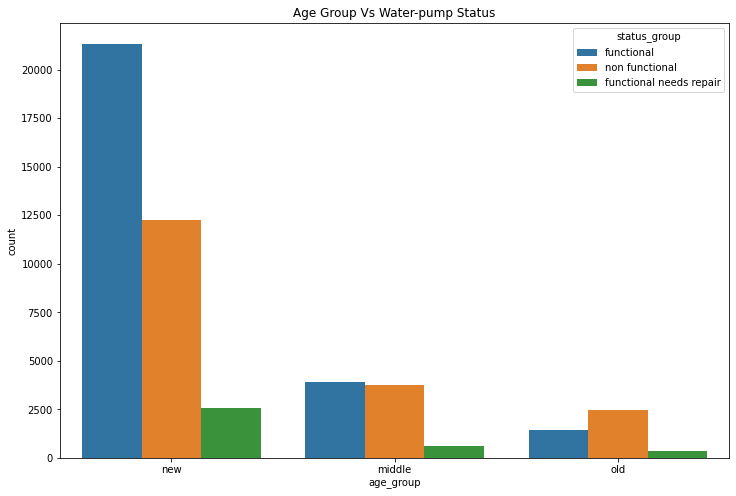

In [ ]:
# There are many age values, will group them for better analysis
def get_age_group(x):
    if x <= 17:
        return 'new'
    elif x > 17 and x <=34:
        return 'middle'
    else:
        return 'old'

# Create new feature age_group
train['age_group'] = train['age'].apply(get_age_group)

# Visualize Relation
plt.subplots(figsize=(12,8))
sns.countplot(x=train['age_group'], hue=train['status_group'])
plt.title('Age Group Vs Water-pump Status')
plt.show()

**Analyzing Relation with Population of the Waterpoint**

In [ ]:
train.population.describe()

count    48651.000000
mean       175.374648
std        470.986147
min          0.000000
25%          0.000000
50%         30.000000
75%        200.000000
max      30500.000000
Name: population, dtype: float64

<Axes: xlabel='population'>

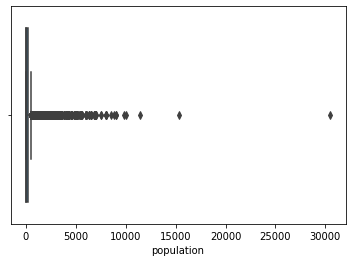

In [ ]:
# Max value and value of 75% population indicates outliers as well as very low population mostly
# Visualize through boxplot
sns.boxplot(x=train.population)

In [ ]:
print('Outlier for population =', train[train.population > 10000].population.tolist() )

Outlier for population = [15300, 30500, 11463]


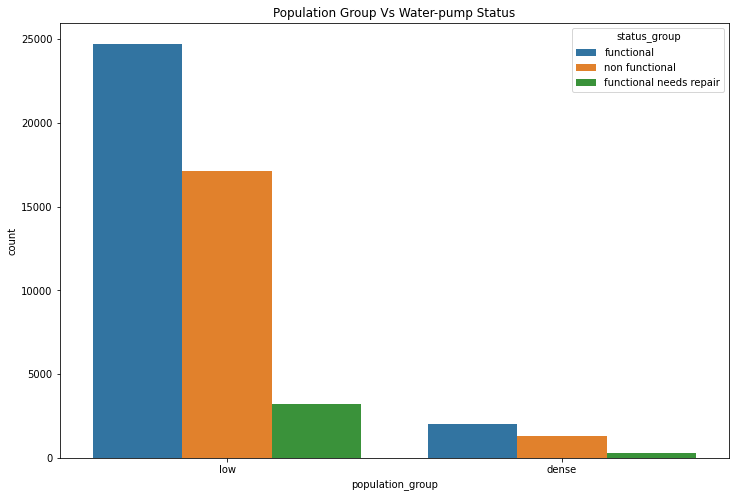

In [ ]:
# Create Population Group to better assess the sparse data
def get_population_group(x):
    if x <= 500:
        return 'low'
    else:
        return 'dense'
    
train['population_group'] = train['population'].apply(get_population_group)

# Visualize Relation
plt.subplots(figsize=(12,8))
sns.countplot(x=train['population_group'], hue=train['status_group'])
plt.title('Population Group Vs Water-pump Status')
plt.show()

It seems there isn't any obvious relation of the status of the waterpoint and population around it


**Exploring relation with other variables: Managment, Payment Type, Source & Waterpoint_Type**

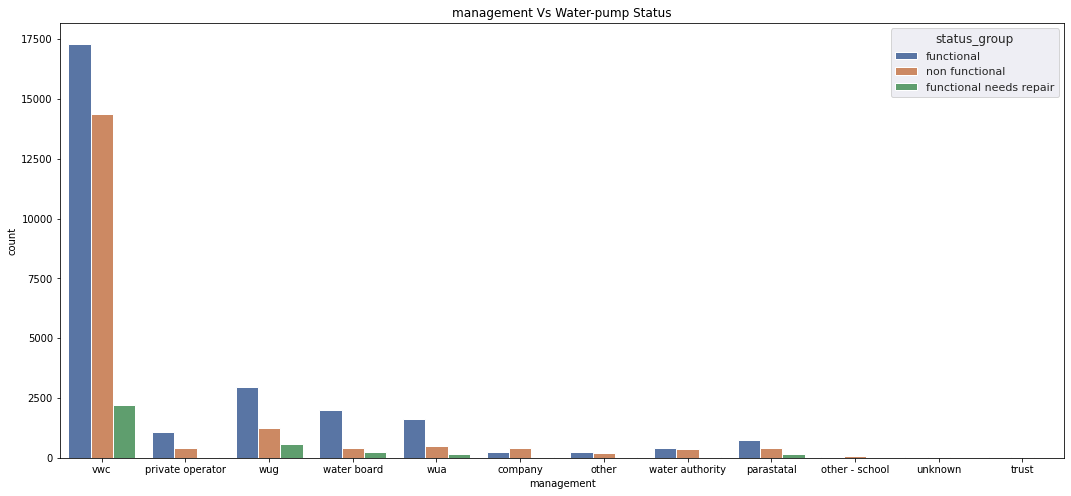

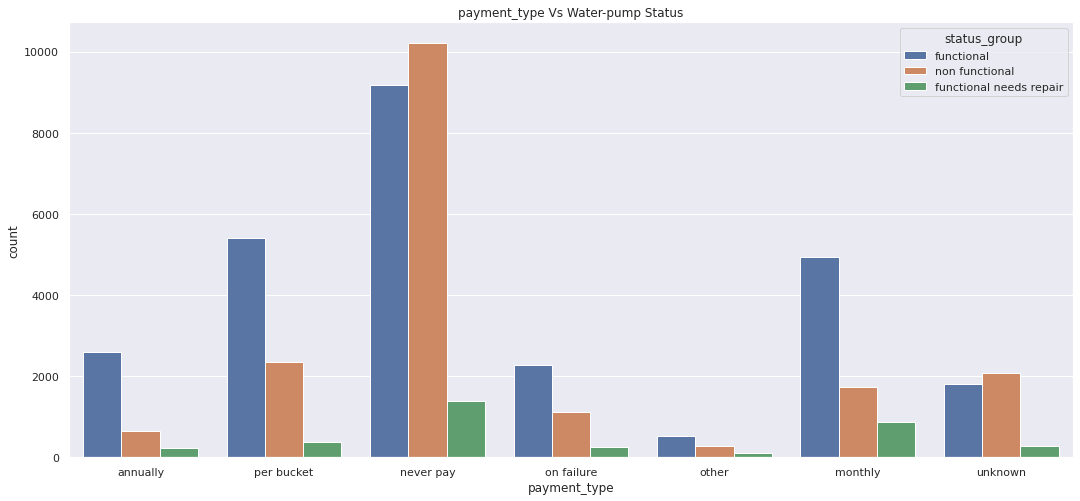

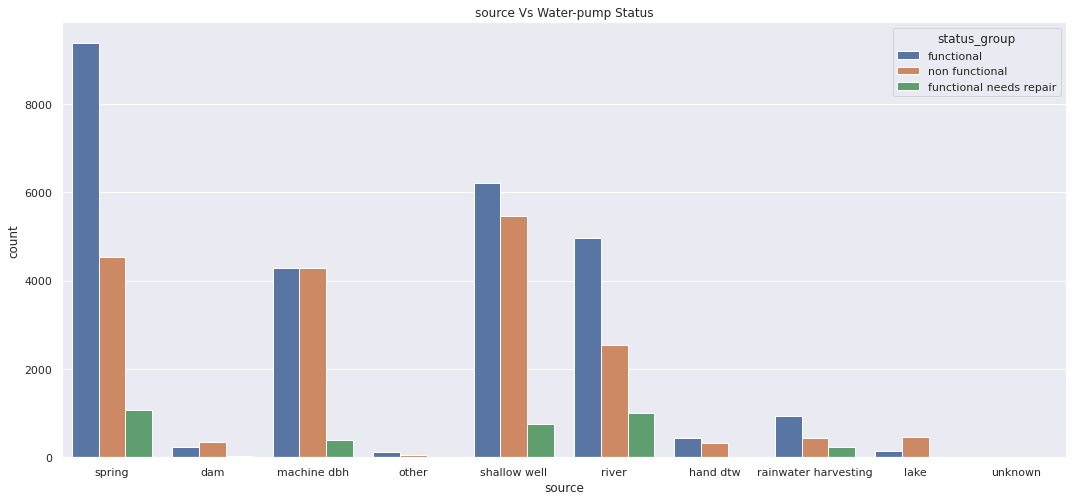

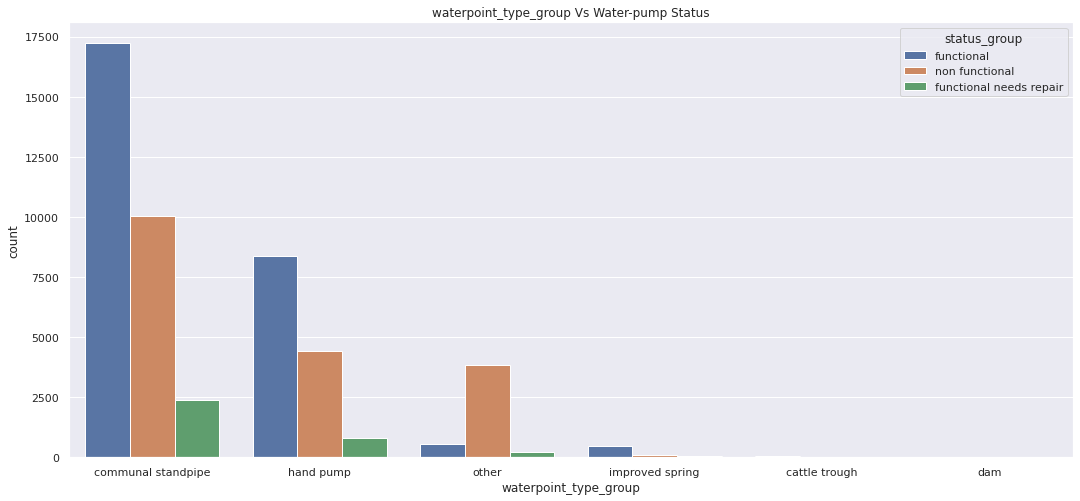

In [ ]:
def plot_counts(featureX):
    plt.subplots(figsize=(18,8))
    sns.set(font_scale=1)
    sns.countplot(x=train[featureX], hue=train['status_group'])
    plt.title(f'{featureX} Vs Water-pump Status')
    plt.show()
    return

# Management of Waterpoint
plot_counts('management')

# Payment Type of Waterpoint
plot_counts('payment_type')

# Water source of Waterpoint
plot_counts('source')

# Water source of Waterpoint
plot_counts('waterpoint_type_group')

***Encoding Categorical Variables***

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
categorical_features = ['funder','installer','basin', 'public_meeting', 'scheme_management', 'permit', 
                        'extraction_type_group', 'management', 'payment_type', 'quality_group', 'quantity_group', 
                        'source', 'waterpoint_type_group', 'age_group', 'population_group', 'status_group']

# Copy status group labels
train['status_group_labels'] = train['status_group']

# Encode values
train[categorical_features] = train[categorical_features].apply(encoder.fit_transform)

In [ ]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48651.0,NaN,NaN,NaN,37123.666461,21434.789,2.0,18563.5,37067.0,55646.5,74247.0
date_recorded,48651,324,2011-03-15,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funder,48651.0,NaN,NaN,NaN,242.011079,148.230656,0.0,139.0,195.0,357.0,519.0
gps_height,48651.0,NaN,NaN,NaN,696.307948,698.803652,-90.0,0.0,451.0,1332.0,2770.0
installer,48651.0,NaN,NaN,NaN,211.999753,149.086701,0.0,115.0,125.0,342.0,565.0
basin,48651.0,NaN,NaN,NaN,4.171918,2.467649,0.0,3.0,4.0,6.0,8.0
region_code,48651.0,NaN,NaN,NaN,14.691928,17.211805,1.0,5.0,12.0,17.0,99.0
district_code,48651.0,NaN,NaN,NaN,5.733983,9.668654,0.0,2.0,3.0,5.0,80.0
population,48651.0,NaN,NaN,NaN,175.374648,470.986147,0.0,0.0,30.0,200.0,30500.0
public_meeting,48651.0,NaN,NaN,NaN,0.910629,0.285282,0.0,1.0,1.0,1.0,1.0


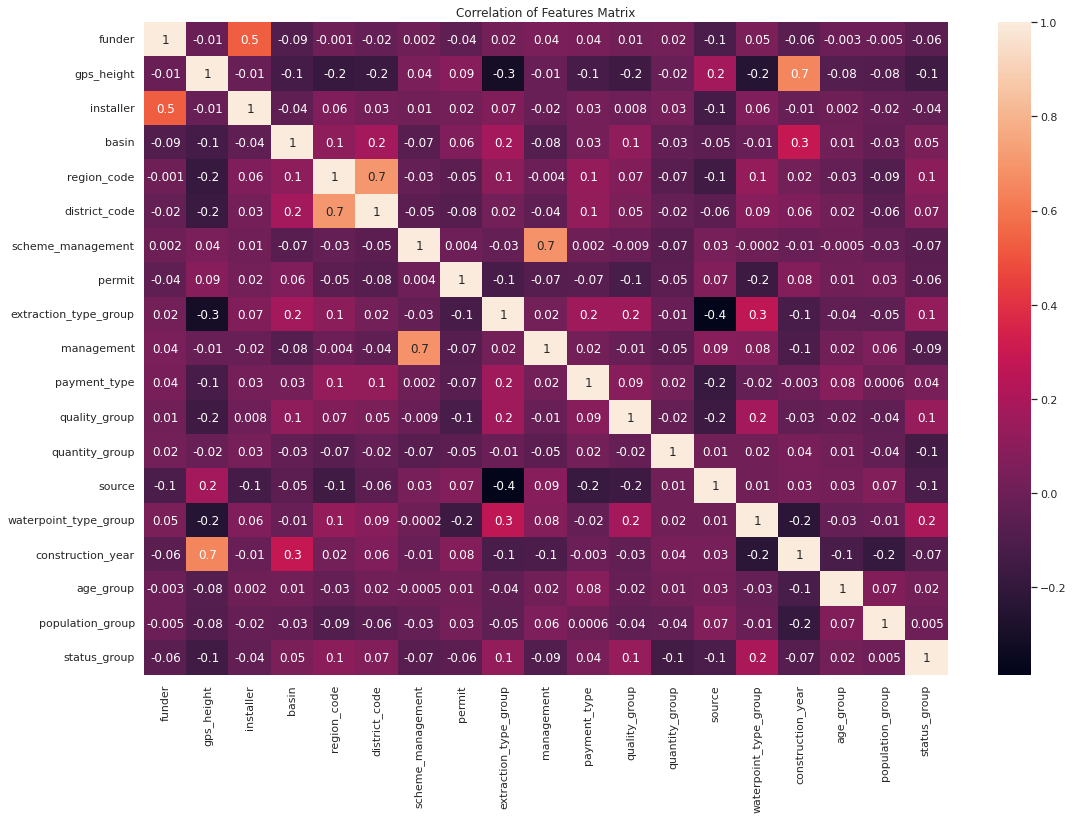

In [ ]:
# Visualize Correlation with features Matrix 
corrMatrix = train[['funder', 'gps_height', 'installer', 'basin', 'region_code', 'district_code', 
            'scheme_management', 'permit', 'extraction_type_group', 'management', 'payment_type', 'quality_group', 'quantity_group', 'source',
            'waterpoint_type_group', 'construction_year', 'age_group', 'population_group', 'status_group']].corr()
plt.subplots(figsize=(18,12))
sns.heatmap(corrMatrix, annot=True, fmt='.1g')
plt.title('Correlation of Features Matrix')
plt.show()

In [ ]:
#Prepare list of features for training and target for prediction
features = ['funder', 'gps_height', 'installer', 'basin', 'region_code', 'district_code', 
            'scheme_management', 'permit', 'extraction_type_group', 'management', 'payment_type', 'quality_group', 'quantity_group', 'source',
            'waterpoint_type_group', 'age_group', 'population_group'] 

target = ['status_group']
train_X = train[features]
train_Y = train[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# random_state = 1, to get same split in case of re-run
# startify = target, to get split containing each type of class proportional to origingal dataset
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, 
                                                    random_state=1, stratify= train_Y, 
                                                    test_size = 0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(32596, 17) (32596, 1)
(16055, 17) (16055, 1)


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [ ]:
y_predicted = rf_classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_predicted)

array([[7568,  360,  890],
       [ 570,  384,  201],
       [1316,  161, 4605]])

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      8818
           1       0.42      0.33      0.37      1155
           2       0.81      0.76      0.78      6082

    accuracy                           0.78     16055
   macro avg       0.68      0.65      0.66     16055
weighted avg       0.78      0.78      0.78     16055



**Tuning Hyperparameter of Classifier**

Applying Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [301,401,501],
    'max_depth' : [11,21,31],    
    'max_features' : ['sqrt','log2']
}

cv = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [11, 21, 31],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [301, 401, 501]})

In [ ]:
cv.best_params_

{'max_depth': 21, 'max_features': 'log2', 'n_estimators': 301}

In [ ]:
# Predict again with the values of best parameters
rf_classifier_bst = RandomForestClassifier(n_estimators=501, n_jobs=-1,max_depth=21, max_features='log2', bootstrap=True, criterion='gini')
rf_classifier_bst.fit(X_train, y_train.values.ravel())
y_predict_bst = rf_classifier_bst.predict(X_test)

**Reviewing Model Performance**

In [ ]:
# Confusion Matrix -> Review where model made mistakes 
# Like False positives, False Negatives etc.

cnf_matrix = confusion_matrix(y_test, y_predict_bst)
cnf_matrix

array([[7861,  259,  698],
       [ 625,  344,  186],
       [1430,  123, 4529]])

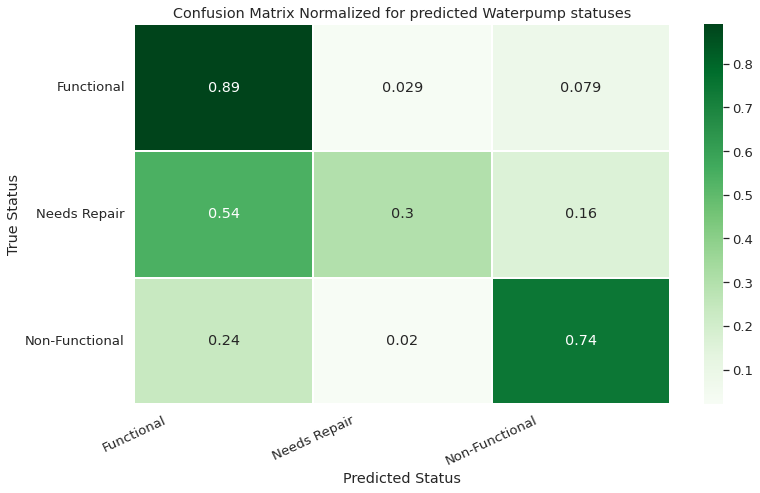

In [ ]:
cnf_matrix = cnf_matrix.astype('float')  / cnf_matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Functional', 'Needs Repair', 'Non-Functional']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Status')
plt.ylabel('True Status')
plt.title('Confusion Matrix Normalized for predicted Waterpump statuses')
plt.show()

In [ ]:
# Get Summary Report of Prediction Metrices
print(classification_report(y_test, y_predict_bst, target_names=class_names))

                precision    recall  f1-score   support

    Functional       0.79      0.89      0.84      8818
  Needs Repair       0.47      0.30      0.37      1155
Non-Functional       0.84      0.74      0.79      6082

      accuracy                           0.79     16055
     macro avg       0.70      0.64      0.66     16055
  weighted avg       0.79      0.79      0.79     16055



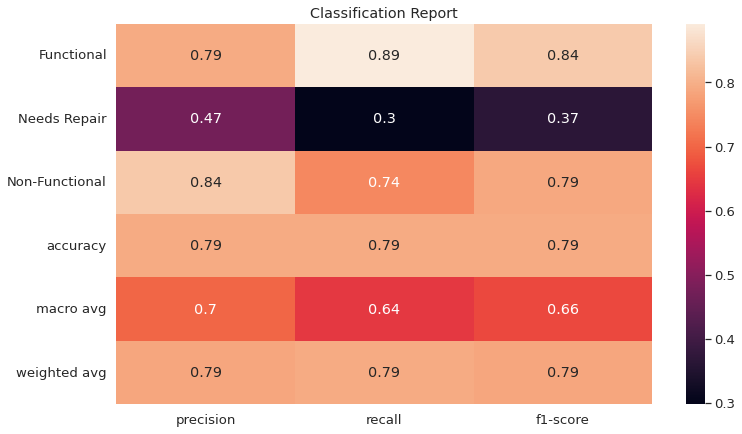

In [ ]:
# Formatting Classification Report
clf_rpt = classification_report(y_test, y_predict_bst, target_names=class_names, output_dict=True)

# .iloc[:-1, :] to exclude support
plt.figure(figsize=(12,7))
sns.heatmap(pd.DataFrame(clf_rpt).iloc[:-1, :].T, annot=True)
plt.title ('Classification Report')
plt.show()

AttributeError: ignored